Import-ul librariilor

In [70]:
# Importăm librăriile necesare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV



Import-ul datelor si definirea coloanelor

In [71]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["Varsta", "Sex", "Tip_durere_toracica", "Tensiune_arteriala_repaus", "Colesterol", "Zahar_sange_repaus", "Rezultate_electrocardiograma_repaus", "Frecventa_cardiaca_maxima", "Angina_indusa_exercitiu", "Depresie_ST", "Panta_segmentului_ST", "Numar_vase_principale_colorate", "Talasemie", "Diagnostic"]
data = pd.read_csv(url, names=column_names)

Converstirea si curatarea datelor

In [72]:
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

data = data.astype(float)

Clasificare binara 

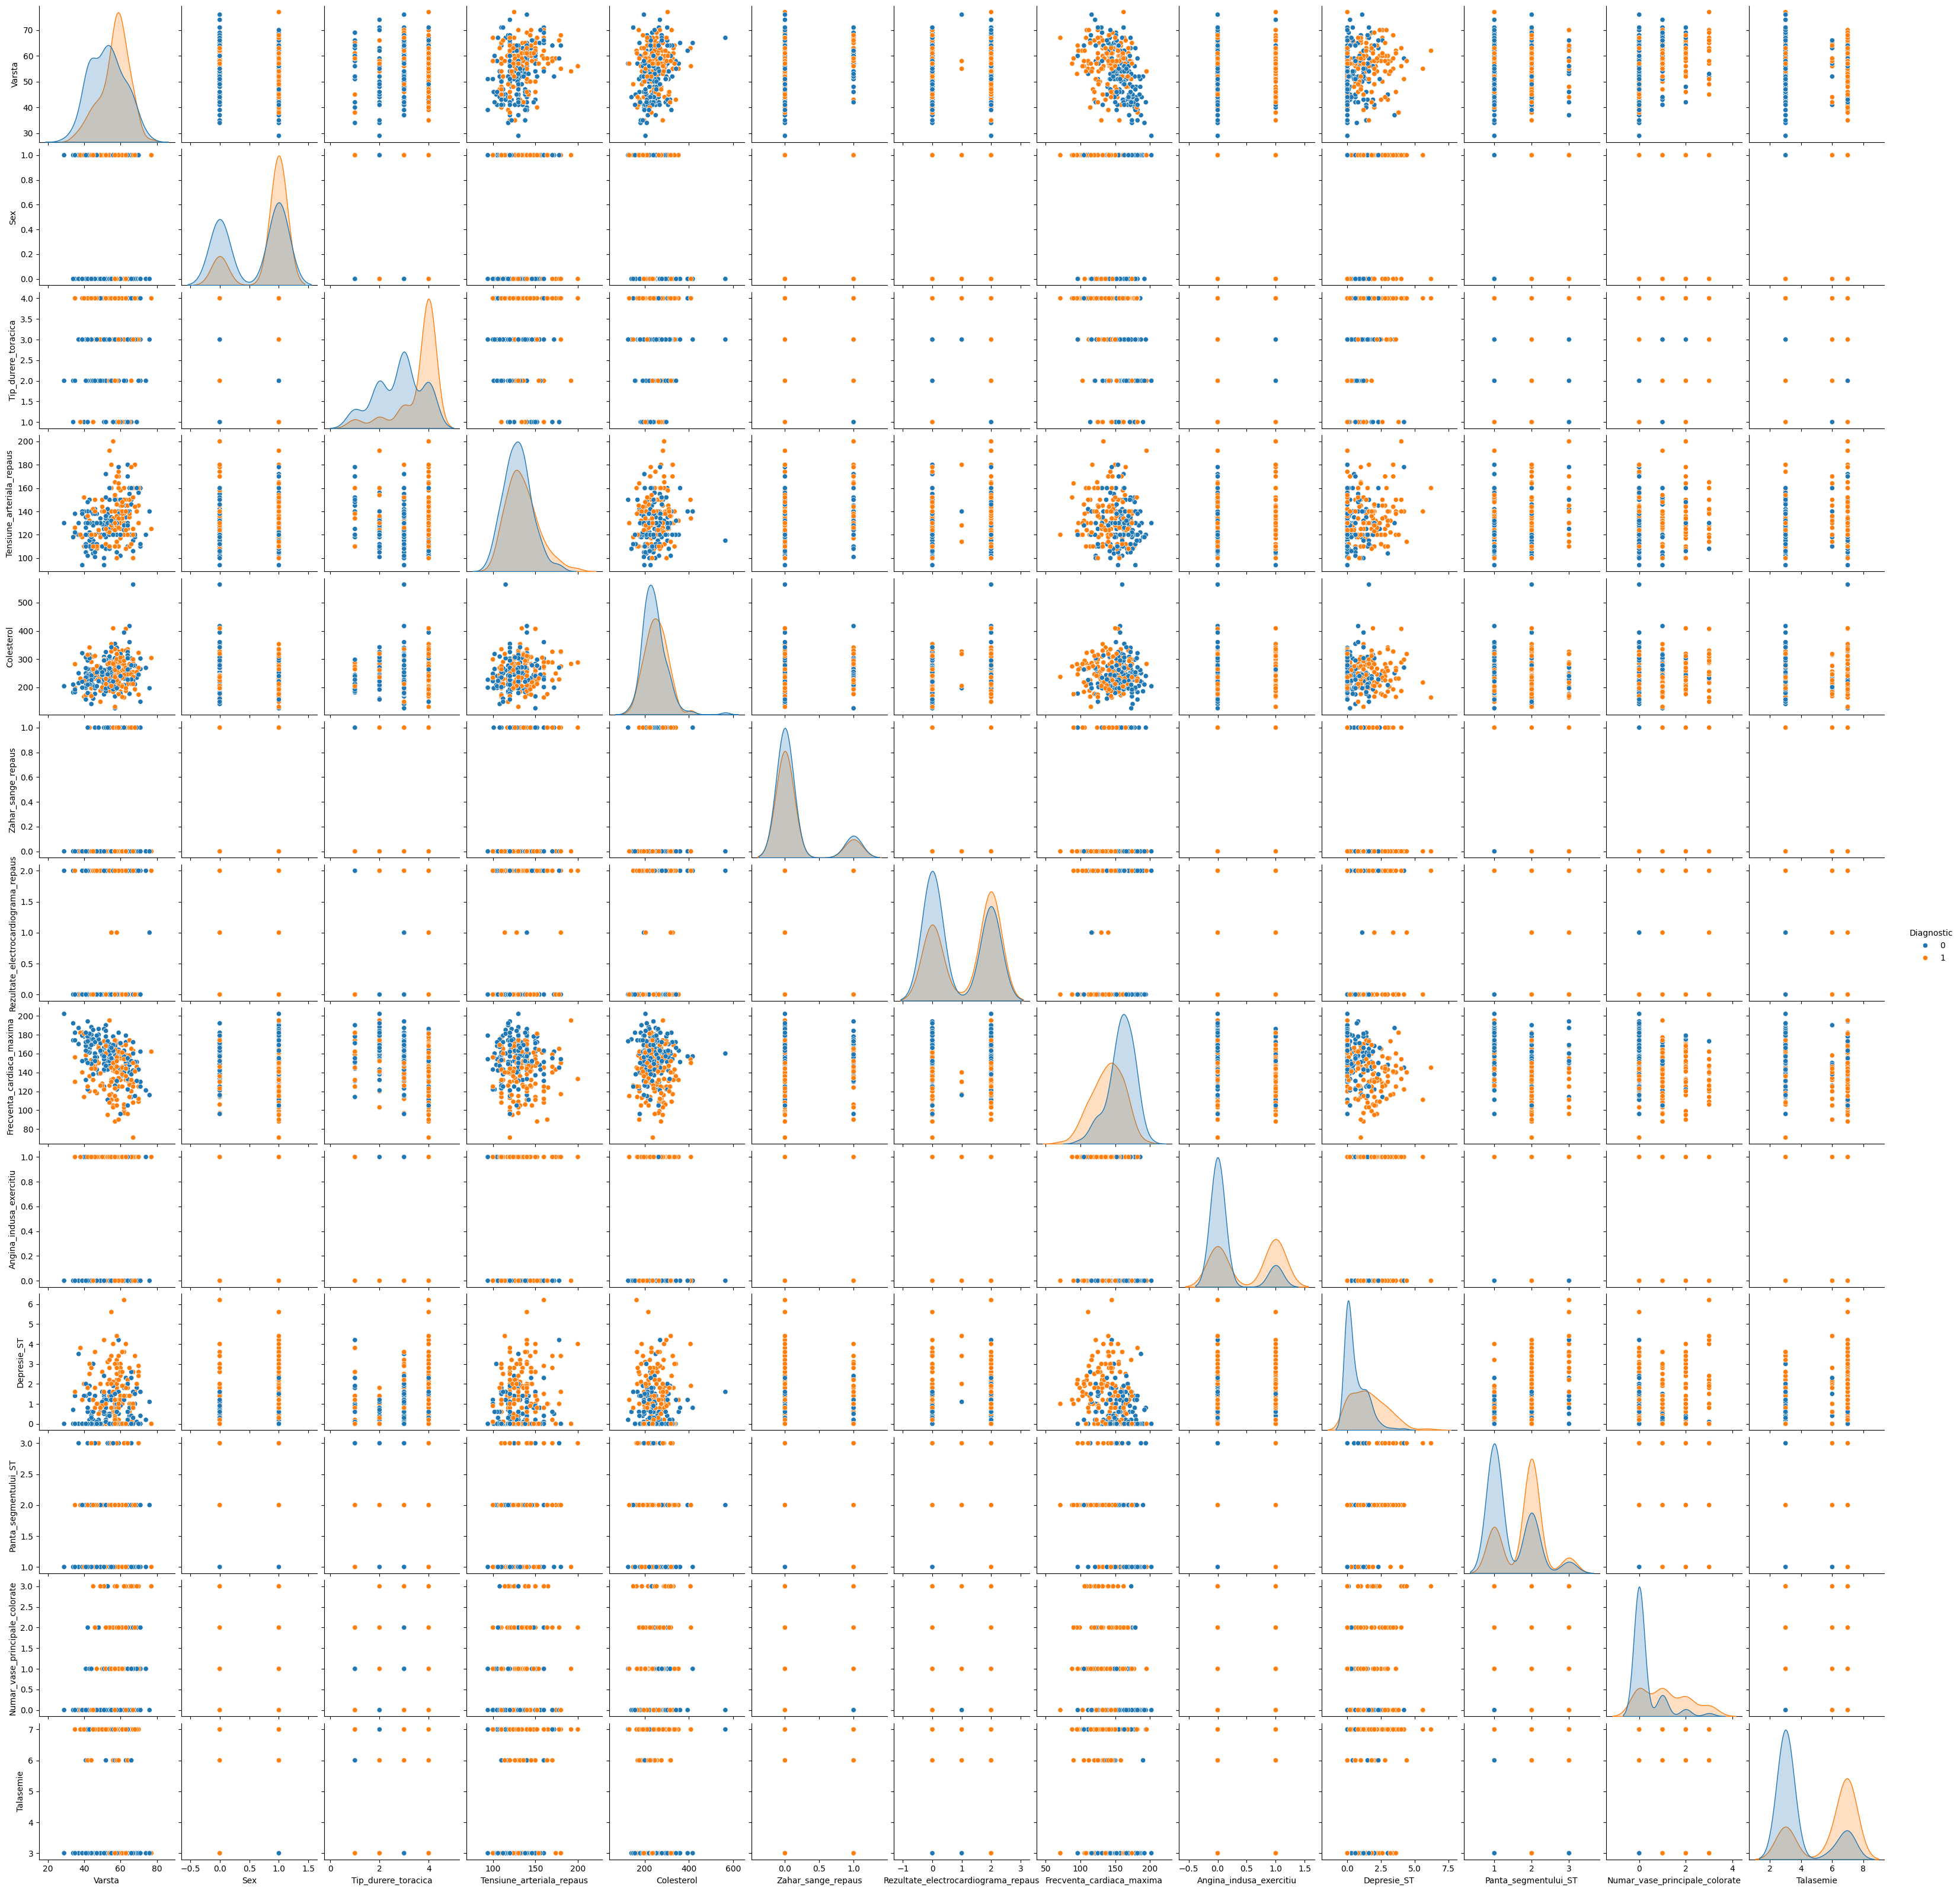

In [73]:
data['Diagnostic'] = data['Diagnostic'].apply(lambda x: 1 if x > 0 else 0)

sns.pairplot(data, hue='Diagnostic')
plt.show()

In [74]:
data.describe()

,Varsta,Sex,Tip_durere_toracica,Tensiune_arteriala_repaus,Colesterol,Zahar_sange_repaus,Rezultate_electrocardiograma_repaus,Frecventa_cardiaca_maxima,Angina_indusa_exercitiu,Depresie_ST,Panta_segmentului_ST,Numar_vase_principale_colorate,Talasemie,Diagnostic
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Antrenarea modelului

In [75]:
X = data.drop("Diagnostic", axis=1)
y = data["Diagnostic"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
print("Confusion Matrix - Validation Set")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report - Validation Set")
print(classification_report(y_val, y_val_pred))


Confusion Matrix - Validation Set
[[24  3]
 [11 21]]

Classification Report - Validation Set
              precision    recall  f1-score   support

           0       0.69      0.89      0.77        27
           1       0.88      0.66      0.75        32

    accuracy                           0.76        59
   macro avg       0.78      0.77      0.76        59
weighted avg       0.79      0.76      0.76        59



In [76]:
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)
print("Cel mai performant parametru:", grid.best_params_)
model = grid.best_estimator_

y_val_pred = model.predict(X_val)
print("Confusion Matrix - Validation Set (Dupa Tuning)")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report - Validation Set (Dupa Tuning)")
print(classification_report(y_val, y_val_pred))


Cel mai performant parametru: {'C': 0.1}
Confusion Matrix - Validation Set (Dupa Tuning)
[[25  2]
 [11 21]]

Classification Report - Validation Set (Dupa Tuning)
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        27
           1       0.91      0.66      0.76        32

    accuracy                           0.78        59
   macro avg       0.80      0.79      0.78        59
weighted avg       0.81      0.78      0.78        59



In [77]:
# Evaluarea modelului pe setul de testare
y_test_pred = model.predict(X_test)
print("Confusion Matrix - Test Set")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Confusion Matrix - Test Set
[[29  4]
 [ 4 23]]

Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.85      0.85      0.85        27

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



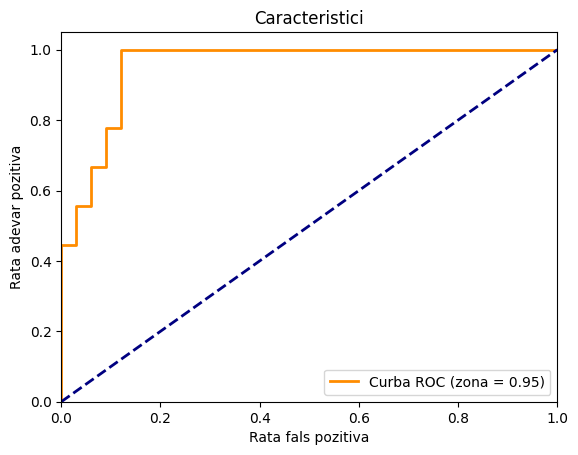

In [78]:
# Curba ROC
y_test_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curba ROC (zona = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rata fals pozitiva')
plt.ylabel('Rata adevar pozitiva')
plt.title('Caracteristici')
plt.legend(loc="lower right")
plt.show()


In [79]:
pacient_nou = pd.DataFrame({
    "Varsta": [45],
    "Sex": [1],
    "Tip_durere_toracica": [2],
    "Tensiune_arteriala_repaus": [120],
    "Colesterol": [235],
    "Zahar_sange_repaus": [0],
    "Rezultate_electrocardiograma_repaus": [0],
    "Frecventa_cardiaca_maxima": [140],
    "Angina_indusa_exercitiu": [0],
    "Depresie_ST": [0],
    "Panta_segmentului_ST": [2],
    "Numar_vase_principale_colorate": [0],
    "Talasemie": [3]
})


In [80]:
# Normalizarea datelor pacientului nou
pacient_nou_scaled = scaler.transform(pacient_nou)

# Realizarea predicției
predicție = model.predict(pacient_nou_scaled)
probabilitate = model.predict_proba(pacient_nou_scaled)


In [81]:
# Afișarea rezultatului
if predicție[0] == 1:
    print("Pacientul are probleme cardiace.")
else:
    print("Pacientul nu are probleme cardiace.")

# Afișarea probabilităților
print(f"Probabilitatea de a avea probleme cardiace: {probabilitate[0][1]:.2f}")
print(f"Probabilitatea de a nu avea probleme cardiace: {probabilitate[0][0]:.2f}")

Pacientul nu are probleme cardiace.
Probabilitatea de a avea probleme cardiace: 0.11
Probabilitatea de a nu avea probleme cardiace: 0.89
